In [1]:
import seaborn.objects as so
import seaborn as sns

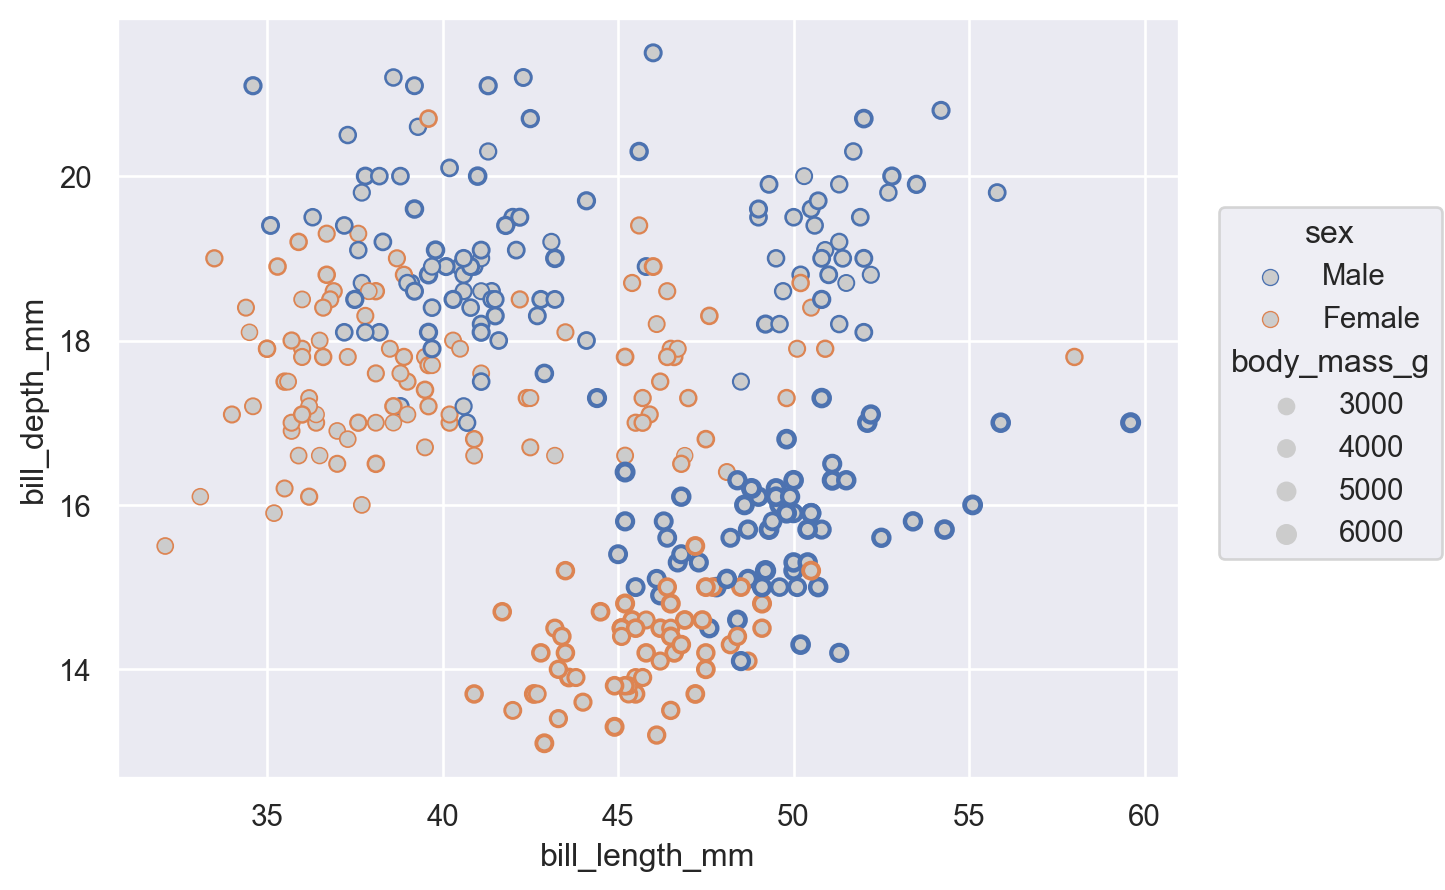

In [2]:
penguins = sns.load_dataset("penguins")
(
    so.Plot(                    # Plot设置全局格式
        penguins,x = "bill_length_mm",y = "bill_depth_mm",
        edgecolor = "sex",edgewidth = "body_mass_g"
    )
    .add(so.Dot(color=".8"))        # Dot图层设置当前散点颜色等
)        


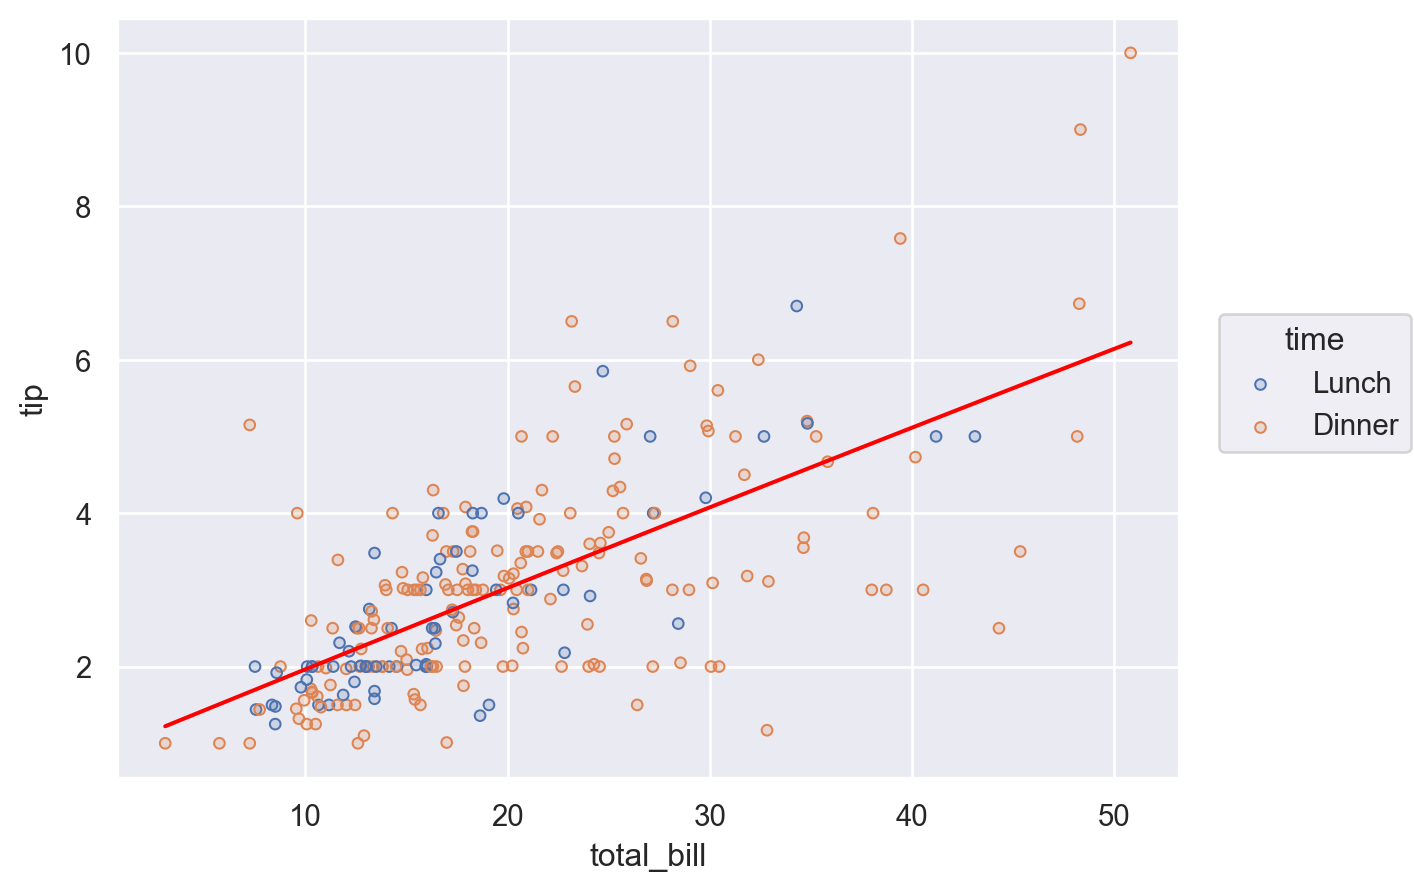

In [3]:
tips = sns.load_dataset("tips")
(
    so.Plot(tips,x="total_bill",y="tip",color="time") # 基础图层添加所有图层的绘图数据，x="total_bill",y="tip"
    .add(so.Dots())         # 添加图层绘制散点图，散点图按照Plot图层中的"time"改变颜色
    .add(so.Line(color="red"),so.PolyFit(),color=None)          # 添加折线图
)

使用scale函数设置颜色、坐标轴、图例、marker等图形外观属性

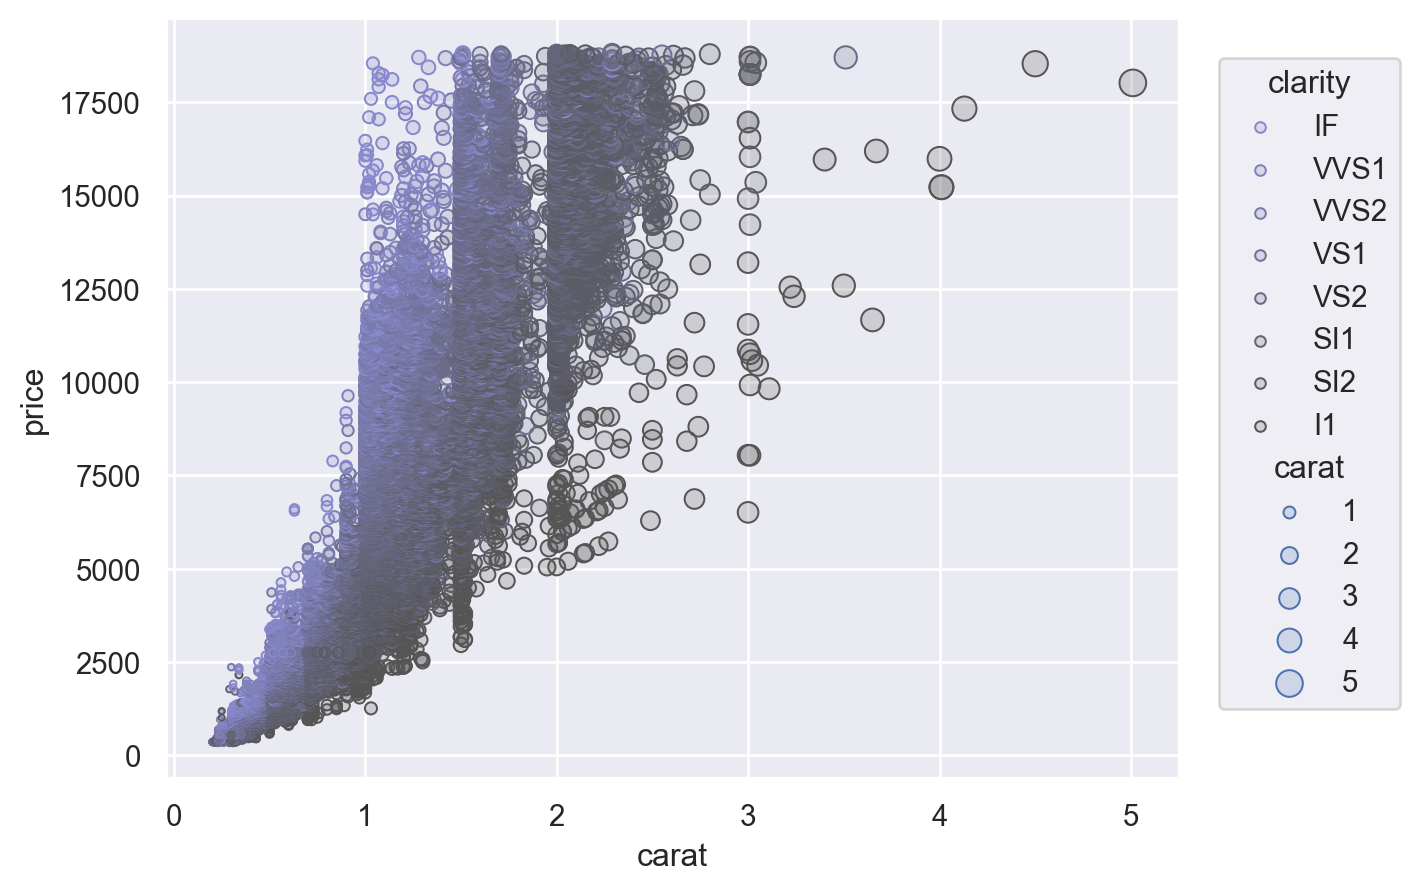

In [4]:
diamonds = sns.load_dataset("diamonds")
(
    so.Plot(diamonds,x = "carat",y = "price",color="clarity",pointsize="carat")
    .add(so.Dots())
    .scale(color=('#88c','#555'),pointsize=(2,10))          # scale图层中设置点颜色、大小
)

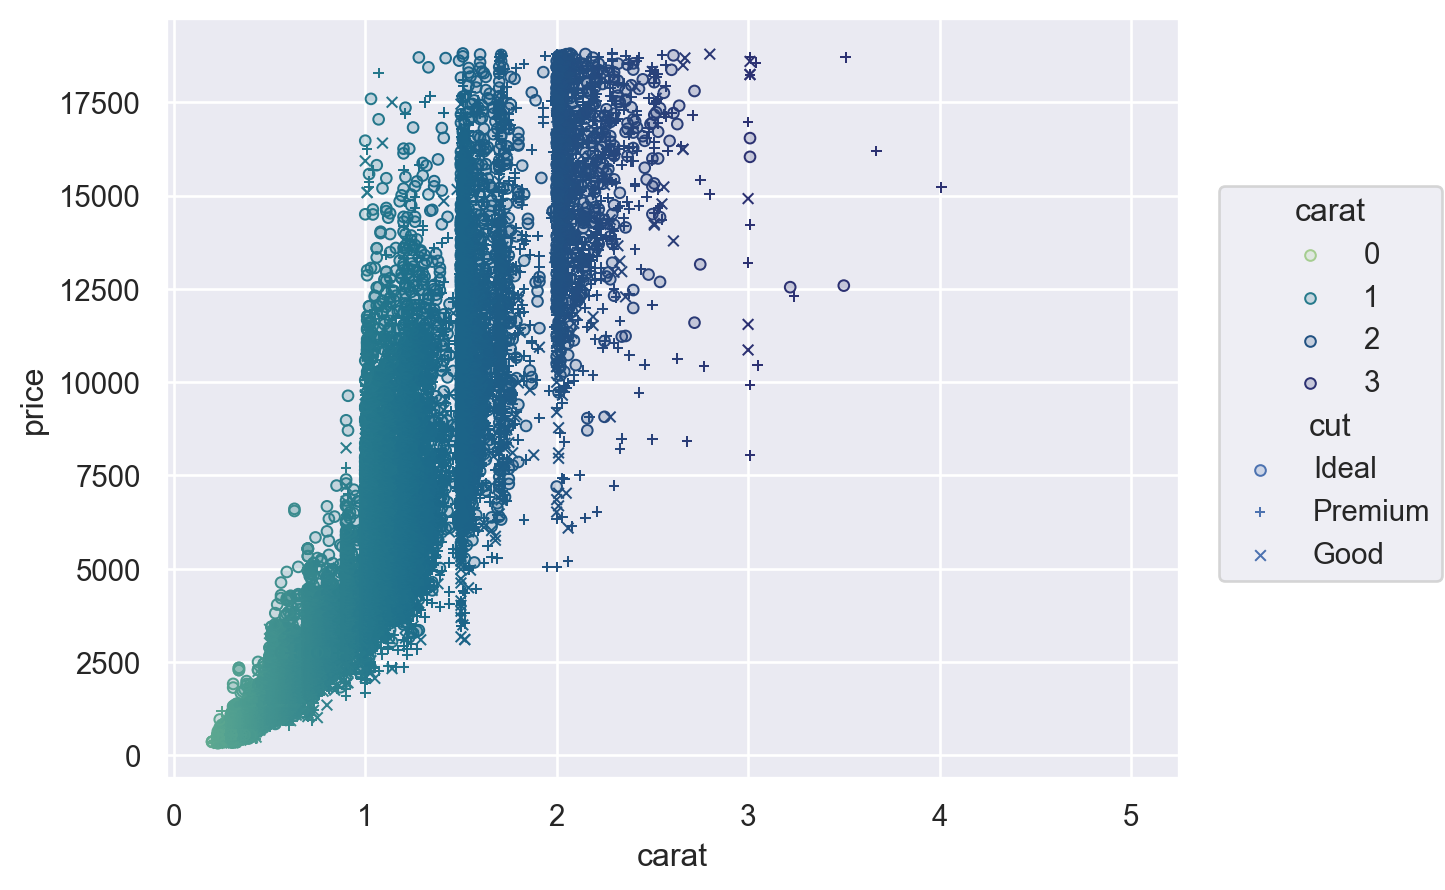

In [5]:
(
    so.Plot(diamonds,x="carat",y="price",color="carat",marker="cut")
    .add(so.Dots())     # 绘制散点图
    .scale(     # 添加图层个性化外观
        color=so.Continuous("crest",norm=(0,3),trans="sqrt"),       # 设置点颜色
        marker=so.Nominal(["o","+","x"],order=["Ideal","Premium","Good"])       # 设置点的marker
    )
)

刻度标签、图例等个性化设置主要使用Continuous().tick、Continuous().label方法

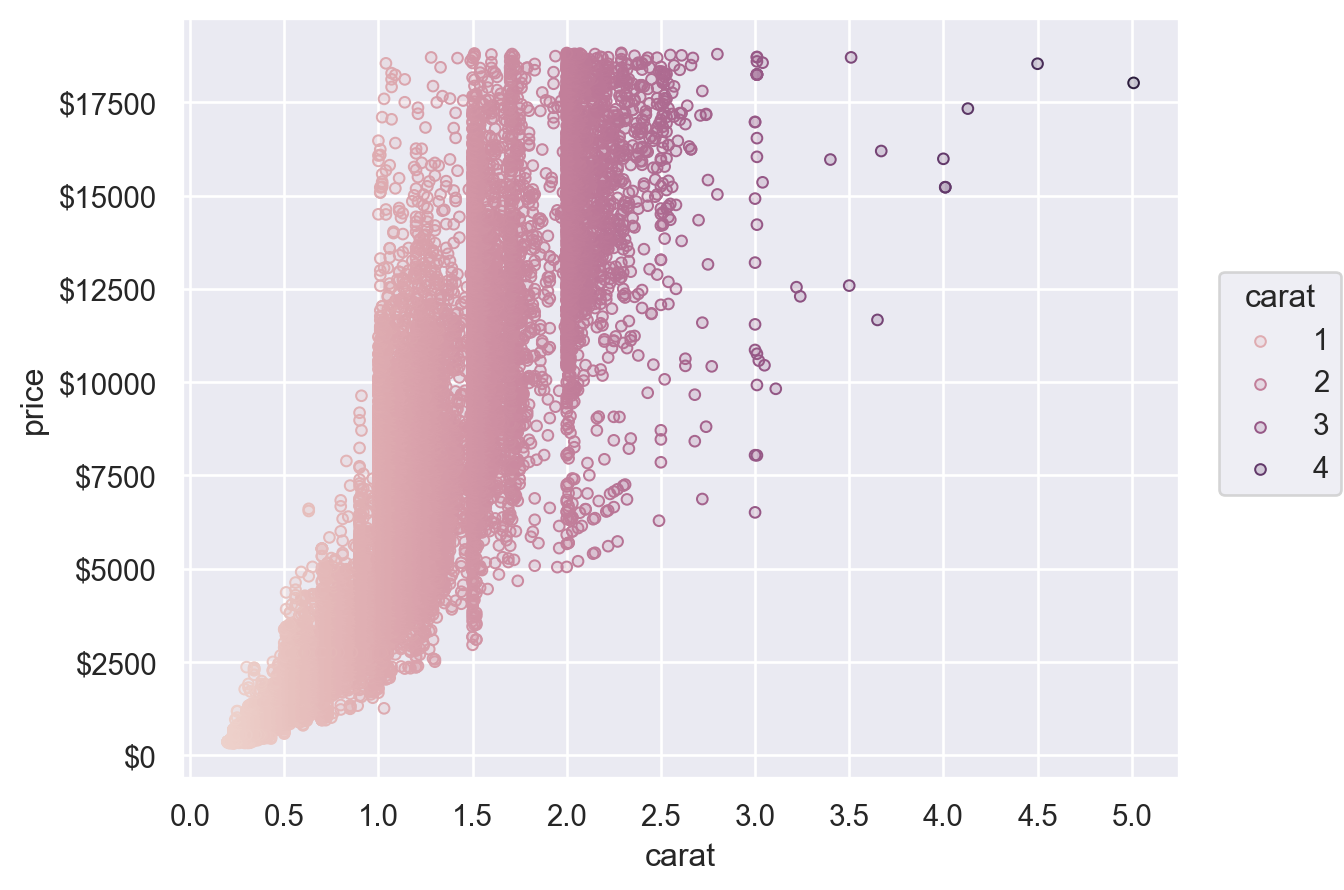

In [9]:
(
    so.Plot(diamonds,x="carat",y="price",color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),    # x轴刻度间隔设置0.5
        y=so.Continuous().label(like="${x:.0f}"),    # y轴刻度格式设置
        color = so.Continuous().tick(at=[1,2,3,4])
    )
)

标题、坐标轴范围、刻度设置主要使用Plot.label()、Plot.limit()和Plot.share()方法

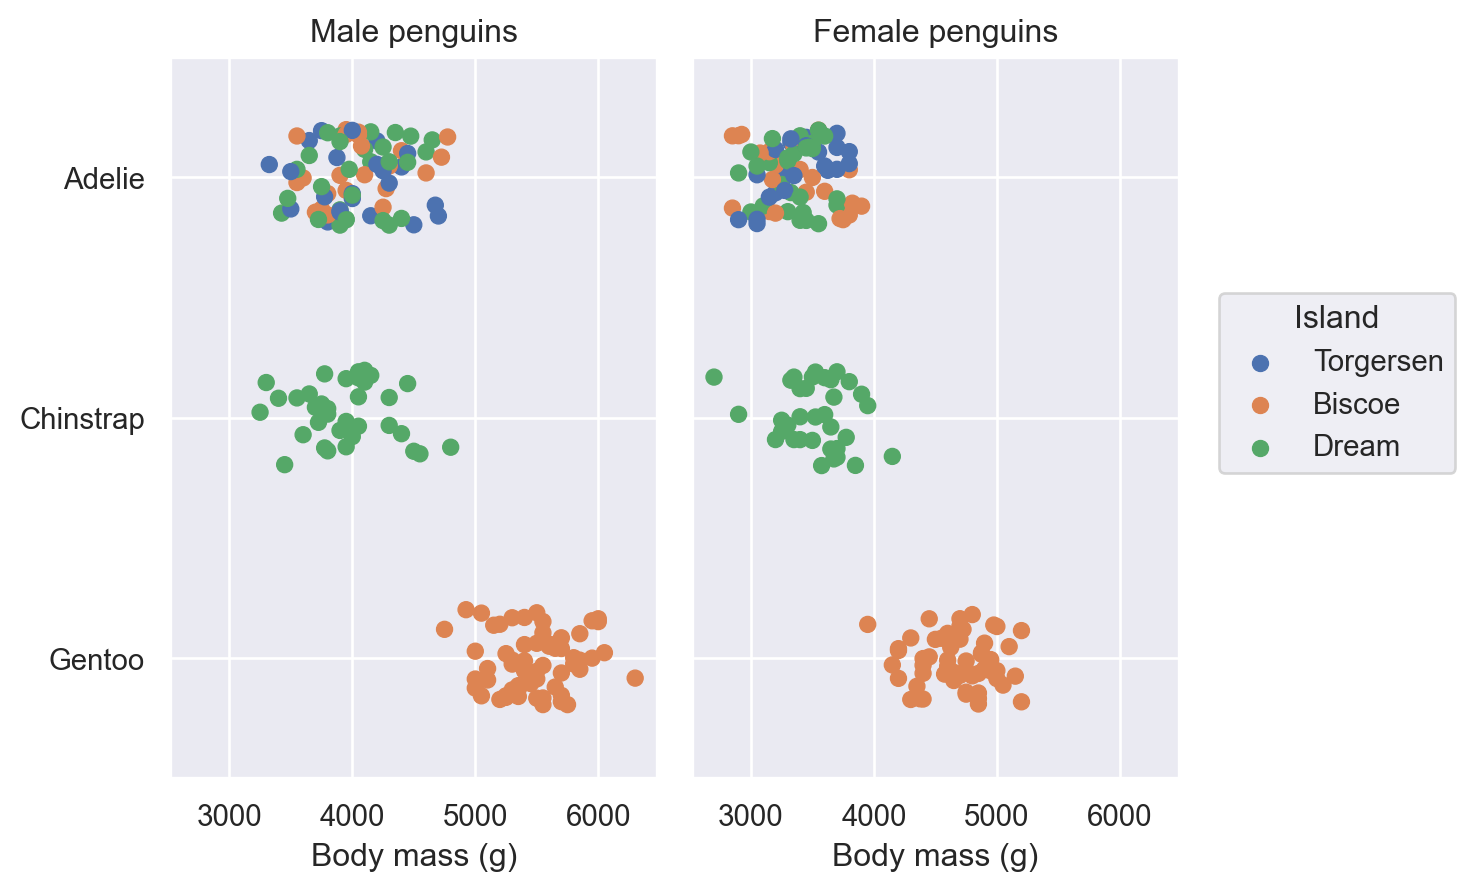

In [12]:
(
    so.Plot(penguins,x="body_mass_g",y="species",color="island")
    .facet(col="sex")
    .add(so.Dot(),so.Jitter(.5))
    .share(x=True)
    .limit(y=(2.5,-.5))
    .label(
        x="Body mass (g)",y="",
        color=str.capitalize,
        title="{} penguins".format
    )
)

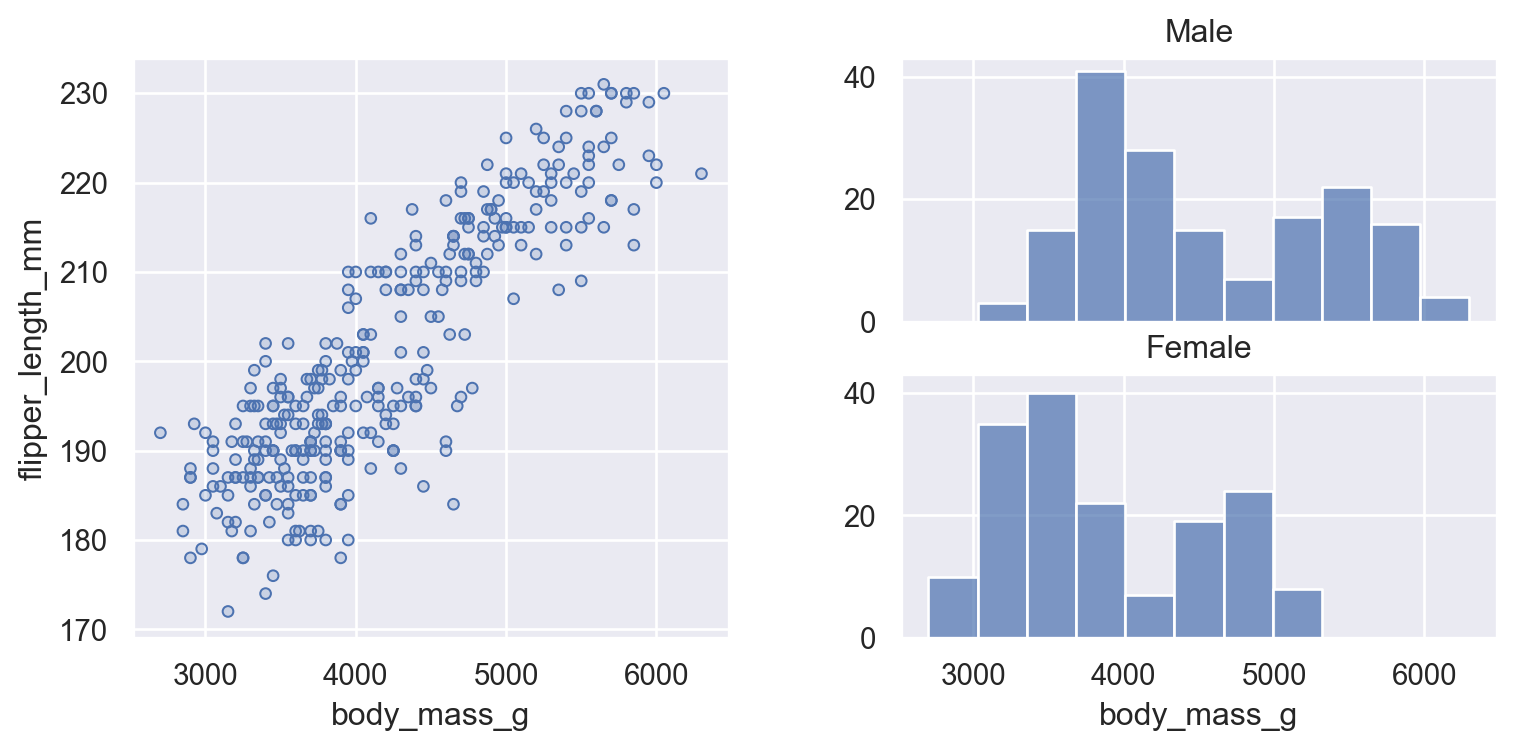

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
f = mpl.figure.Figure(figsize=(8,4))
sf1,sf2 = f.subfigures(1,2)
(
    so.Plot(penguins,x="body_mass_g",y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)

(
    so.Plot(penguins,x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(),so.Hist())
    .on(sf2)
    .plot()
)

In [10]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
